# K-Nearest-Neighbor - Multi Class Classification

Author : Arijit Roy Chowdhury

Email : rc.arijit@gmail.com

Designation : Data Scientist

## Import the Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np  
import pandas as pd  
import itertools
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ROCAUC, roc_auc
from yellowbrick.features import RadViz

In [2]:
# Let's use the classical iris dataset in this example
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Train-Test Split

In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)  

## Pre-Processing and Standardization

In [6]:
from sklearn.preprocessing import StandardScaler  # same as preprocessing.scale(data)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## K-Nearest Neighbours Classifier

# Detection of Optimal Value for K Neighnours

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 100):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

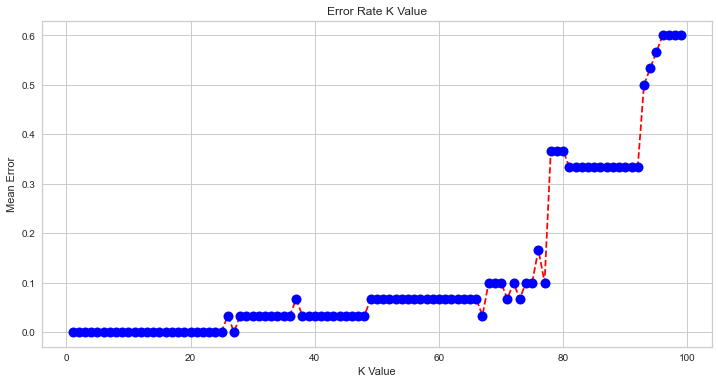

In [8]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=80)
# In the Detection of Optimal Value for K Neighnours plot, 5 shows stable result. 
# But we have chosen 80 for demonstration in order to deliberately get some misclassifications
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=80)

## Predictions & Evaluations

In [10]:
y_pred = classifier.predict(X_test)  

In [11]:
accuracy_score(y_test, y_pred)

0.6333333333333333

In [12]:
print(classification_report(y_test, y_pred))  

# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.44      0.89      0.59         9
 Iris-virginica       0.50      0.09      0.15        11

       accuracy                           0.63        30
      macro avg       0.65      0.66      0.58        30
   weighted avg       0.65      0.63      0.57        30



# Confusion Matrix

In [13]:
# Function to plot Confusion Matrix as a Heatmap

def plot_confusion_matrix(normalize=False):
    cm = confusion_matrix(y_test, y_pred)
    classes=["Setosa", "Versicolor", "Virginica"]
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap='hot')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize = 16,
                 color="black" if cm[i, j] > thresh else "yellow")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

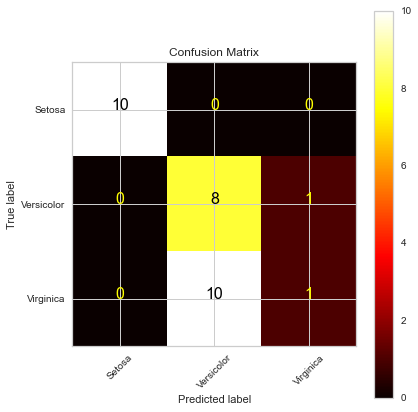

In [14]:
plt.figure(figsize=(6,6))
plot_confusion_matrix()
plt.show()

# Area Under Curve

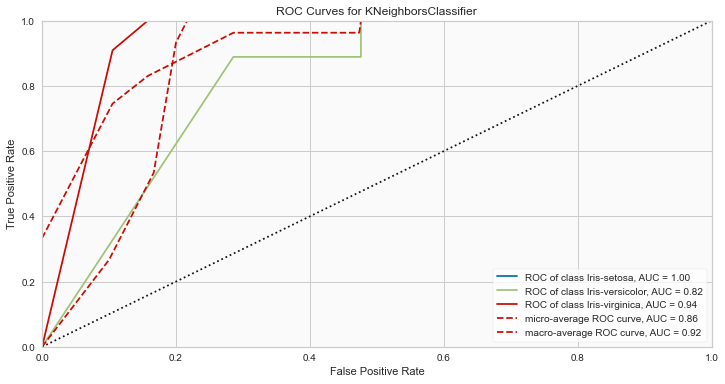

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#fafafa')

visualizer = ROCAUC(classifier, ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
auc = visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure